In [628]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import time
import numpy as np
import csv
from datetime import datetime

In [629]:
num_sweeps = 200

# Run hackrf_sweep command and capture output
command = "hackrf_sweep -f 5100:6000 -w 400000 -N 200 -l 40" 
# REMEMBER TO CHANGE NUMBER OF SWEEPS: -N :D
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, text=True)

# Process the captured output
result = process.stdout.read()

output_file_path = "hackrf_sweep_output.csv"
with open(output_file_path, "w") as output_file:
    process = subprocess.Popen(command, stdout=output_file, shell=True, text=True)
    process.wait()

# Check if the command was successful
if process.returncode == 0:
    print(f"Data saved to {output_file_path}")
else:
    print("Error running hackrf_sweep:", process.stderr)

call hackrf_sample_rate_set(20.000 MHz)
call hackrf_baseband_filter_bandwidth_set(15.000 MHz)
Sweeping from 5100 MHz to 6000 MHz
Stop with Ctrl-C
8 total sweeps completed, 7.98 sweeps/second
17 total sweeps completed, 8.48 sweeps/second
27 total sweeps completed, 8.98 sweeps/second
36 total sweeps completed, 8.98 sweeps/second
45 total sweeps completed, 8.98 sweeps/second
54 total sweeps completed, 8.98 sweeps/second
63 total sweeps completed, 8.98 sweeps/second
72 total sweeps completed, 8.98 sweeps/second
81 total sweeps completed, 8.98 sweeps/second
90 total sweeps completed, 8.98 sweeps/second
99 total sweeps completed, 8.98 sweeps/second
108 total sweeps completed, 8.98 sweeps/second
117 total sweeps completed, 8.98 sweeps/second
126 total sweeps completed, 8.98 sweeps/second
135 total sweeps completed, 8.98 sweeps/second
144 total sweeps completed, 8.98 sweeps/second
153 total sweeps completed, 8.98 sweeps/second
163 total sweeps completed, 9.04 sweeps/second
172 total sweeps com

Data saved to hackrf_sweep_output.csv


199 total sweeps completed, 9.03 sweeps/second

Exiting...
Total sweeps: 200 in 22.14321 seconds (9.03 sweeps/second)
hackrf_close() done
hackrf_exit() done
exit


In [630]:
# Read the CSV file into a Pandas DataFrame without headers
csv_file_path = 'hackrf_sweep_output.csv'
df = pd.read_csv(csv_file_path, header=None)

# Extract values from DataFrame and convert to NumPy array
data_array = df.values
num_rows_in_sweep = data_array[:, 0].shape[0] / num_sweeps
data_sweep = data_array[:int(num_rows_in_sweep), :] # The first num_rows_in_sweep rows are 1 sweep



sweep_xvalues = np.full(data_sweep.shape[0] * (data_sweep.shape[1] - 6), 0) # get x_values size from the shape of the data_sweep
for i in range(sweep_xvalues.size):
    sweep_xvalues[0] = data_sweep[0,2]
    sweep_xvalues[i] = sweep_xvalues[i-1] + data_sweep[0, 4]

print(sweep_xvalues)

sweep_yvalues = np.full(data_sweep.shape[0] * (data_sweep.shape[1] - 6), 0.0, dtype=float) # Generate a vector with 5* the shape of data_swee || Each row in the .csv file has 5 values

for a in range(data_sweep.shape[0]):
    for i in range(data_sweep.shape[1] - 6):
        sweep_yvalues[i + a * (data_sweep.shape[1] - 6)] = data_sweep[a, 6 + i]

print(sweep_yvalues)

[5100000000 5100384615 5100769230 ... 5998845255 5999229870 5999614485]
[-58.84 -57.42 -57.95 ... -63.06 -58.67 -58.82]


In [631]:
'''sweep_xvalues = np.full(data_sweep.shape[0], 0) # get x_values size from the shape of the data_sweep

x_values = np.full(5, data_sweep[0, 2])
x2_values = np.full(5, data_sweep[1, 2])
for i in range(x_values.size):
    x_values[i] = x_values[i-1] + data_sweep[0, 4]

print(x_values)'''


'sweep_xvalues = np.full(data_sweep.shape[0], 0) # get x_values size from the shape of the data_sweep\n\nx_values = np.full(5, data_sweep[0, 2])\nx2_values = np.full(5, data_sweep[1, 2])\nfor i in range(x_values.size):\n    x_values[i] = x_values[i-1] + data_sweep[0, 4]\n\nprint(x_values)'

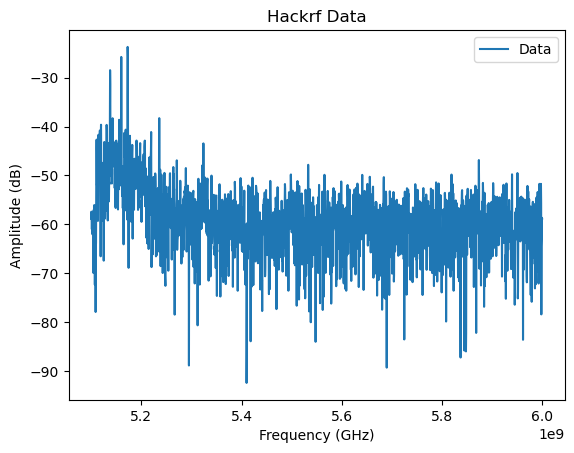

In [632]:
# y_values = data_sweep[0, 6:11]

# Plot the data
plt.plot(sweep_xvalues, sweep_yvalues)
plt.title('Hackrf Data')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.legend(['Data'])
plt.show()

Compute the 2D matrix to plot in the waterfall graph

In [633]:
'''num_rows = 100 # Number of sweeps
num_columns = sweep_yvalues.shape[0]
wtf_array = np.zeros((num_rows, num_columns), dtype=float) # Create a 2D array to store the data vectors

sweep_yvalues = np.full(data_sweep.shape[0] * (data_sweep.shape[1] - 6), 0.0, dtype=float) # Generate a vector with num_rows_in_sweep* the shape of data_sweep || Each row in the .csv file has 5 values
for j in range(wtf_array.shape[0]):
    data_sweep0 = data_array[j + num_rows_in_sweep*j:num_rows_in_sweep + j + num_rows_in_sweep*j, :]
    for a in range(data_sweep0.shape[0]):
        for i in range(data_sweep0.shape[1] - 6):
            wtf_array[j, i + a * (data_sweep0.shape[1] - 6)] = data_sweep0[a, 6 + i]

wtf_array'''


'num_rows = 100 # Number of sweeps\nnum_columns = sweep_yvalues.shape[0]\nwtf_array = np.zeros((num_rows, num_columns), dtype=float) # Create a 2D array to store the data vectors\n\nsweep_yvalues = np.full(data_sweep.shape[0] * (data_sweep.shape[1] - 6), 0.0, dtype=float) # Generate a vector with num_rows_in_sweep* the shape of data_sweep || Each row in the .csv file has 5 values\nfor j in range(wtf_array.shape[0]):\n    data_sweep0 = data_array[j + num_rows_in_sweep*j:num_rows_in_sweep + j + num_rows_in_sweep*j, :]\n    for a in range(data_sweep0.shape[0]):\n        for i in range(data_sweep0.shape[1] - 6):\n            wtf_array[j, i + a * (data_sweep0.shape[1] - 6)] = data_sweep0[a, 6 + i]\n\nwtf_array'

In [634]:
num_rows = int(num_rows_in_sweep)  # Number of sweeps
num_columns = sweep_yvalues.shape[0]

# Create a 2D array to store the data vectors
wtf_array = np.zeros((num_rows, num_columns), dtype=float)

# Generate a vector with num_rows_in_sweep * the shape of data_sweep
# Each row in the .csv file has 5 values
sweep_yvalues = np.full(data_sweep.shape[0] * (data_sweep.shape[1] - 6), 0.0, dtype=float)

for j in range(num_rows):
    start_index = j * num_rows
    end_index = start_index + num_rows
    data_sweep = data_array[start_index:end_index, :]
    
    for a in range(data_sweep.shape[0]):
        for i in range(data_sweep.shape[1] - 6):
            # Calculate the correct index for wtf_array
            index = i + a * (data_sweep.shape[1] - 6)
            wtf_array[j, index] = data_sweep[a, 6 + i]

wtf_array

array([[-58.84, -57.42, -57.95, ..., -63.06, -58.67, -58.82],
       [-62.23, -64.47, -57.4 , ..., -59.57, -63.65, -63.66],
       [-55.48, -49.16, -49.76, ..., -64.3 , -61.13, -61.96],
       ...,
       [-52.37, -51.57, -51.25, ..., -58.06, -62.61, -67.77],
       [-45.3 , -46.44, -49.21, ..., -58.09, -57.1 , -61.32],
       [-51.33, -50.02, -52.24, ..., -54.47, -57.09, -65.96]])

Compute the time vector

In [635]:
# Extract the time strings
time_string = data_array[:, 1]

# Convert each date string to seconds
seconds_since_midnight_list = []

for date_string in time_string:
    date_string = date_string.strip()
    datetime_object = datetime.strptime(date_string, "%H:%M:%S.%f")
    seconds_since_midnight = (datetime_object - datetime_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    seconds_since_midnight_list.append(seconds_since_midnight)

# Print the results
seconds_since_midnight_array = np.array(seconds_since_midnight_list)

# Define the number of elements in each group
group_size = num_rows

# Calculate the number of elements in each row
elements_per_row = len(seconds_since_midnight_array) // num_rows

# Reshape the array and calculate mean values along each row
reshaped_array = seconds_since_midnight_array[:num_rows * elements_per_row].reshape((num_rows, elements_per_row))
mean_values = np.mean(reshaped_array, axis=1)
mean_values = mean_values - mean_values[0]
# Print the shape of the result
print(mean_values)

[ 0.          0.1226224   0.24533976  0.36801912  0.49147392  0.61415264
  0.73685192  0.8595332   0.98302796  1.1056998   1.22839076  1.35106964
  1.47455348  1.59720668  1.7198878   1.84258132  1.9660678   2.08872364
  2.2114116   2.33409776  2.45757604  2.58025012  2.70296816  2.825666
  2.94912392  3.07180032  3.19444216  3.31713456  3.44062488  3.5632968
  3.68598412  3.80869148  3.9321564   4.05485704  4.1775314   4.30020364
  4.42372624  4.54637312  4.66906968  4.79176376  4.9152008   5.0379088
  5.160553    5.28322972  5.4067346   5.52940884  5.6520682   5.77476788
  5.89822504  6.02092928  6.14363164  6.26628684  6.3897452   6.51246784
  6.63511984  6.75781144  6.88128604  7.00397972  7.12663728  7.24932336
  7.37281548  7.49552156  7.6182022   7.74089228  7.86434448  7.98705176
  8.10974652  8.23239372  8.35587272  8.47856696  8.60124472  8.72393544
  8.84739204  8.9700842   9.09276496  9.2154404   9.33887504  9.46157384
  9.58425828  9.70693172  9.83041976  9.9531068  10.075

In [636]:
'''time_string = data_array[:,1]
# Convert each date string to seconds
seconds_since_midnight_list = []

for date_string in time_string:
    date_string = date_string.strip()
    datetime_object = datetime.strptime(date_string, "%H:%M:%S.%f")
    seconds_since_midnight = (datetime_object - datetime_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    seconds_since_midnight_list.append(seconds_since_midnight)

# Print the results
seconds_since_midnight_array = np.array(seconds_since_midnight_list)

# Define the number of elements in each group
group_size = num_rows

# Calculate the mean values in groups of num_rows_in_sweep
mean_values_array = np.mean(seconds_since_midnight_array.reshape(-1, group_size), axis=1)

normalized_values_array = mean_values_array - mean_values_array[0]'''

'time_string = data_array[:,1]\n# Convert each date string to seconds\nseconds_since_midnight_list = []\n\nfor date_string in time_string:\n    date_string = date_string.strip()\n    datetime_object = datetime.strptime(date_string, "%H:%M:%S.%f")\n    seconds_since_midnight = (datetime_object - datetime_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()\n    seconds_since_midnight_list.append(seconds_since_midnight)\n\n# Print the results\nseconds_since_midnight_array = np.array(seconds_since_midnight_list)\n\n# Define the number of elements in each group\ngroup_size = num_rows\n\n# Calculate the mean values in groups of num_rows_in_sweep\nmean_values_array = np.mean(seconds_since_midnight_array.reshape(-1, group_size), axis=1)\n\nnormalized_values_array = mean_values_array - mean_values_array[0]'

Plot as a waterfall type

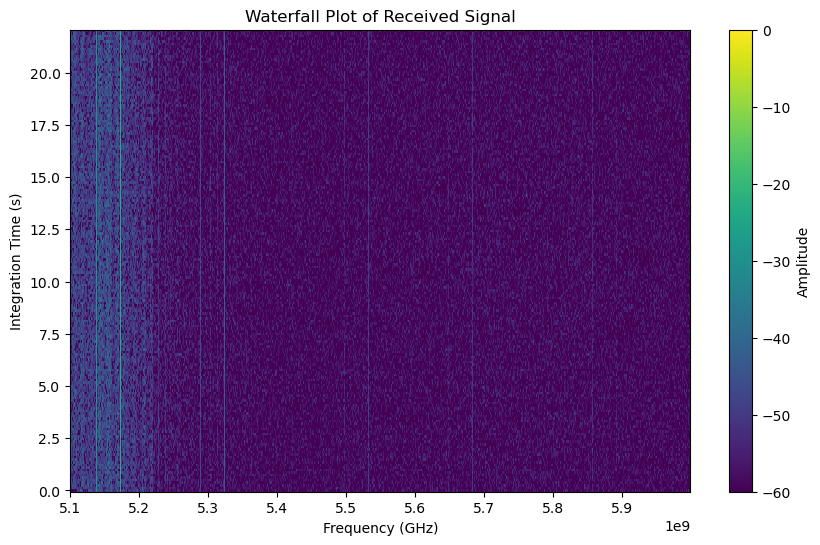

In [637]:
# Waterfall plot

# Set your custom threshold values
custom_thresholds = [-60, -50, -20, -10, -5, 0]  # Adjust these values as needed


plt.figure(figsize=(10, 6))
plt.pcolormesh(sweep_xvalues, mean_values, wtf_array, shading='auto', cmap='viridis', vmin=custom_thresholds[0], vmax=custom_thresholds[-1])
plt.colorbar(label='Amplitude')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Integration Time (s)')
plt.title('Waterfall Plot of Received Signal')
plt.show()
